# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
    plot_confusion_matrix, roc_auc_score, plot_roc_curve, confusion_matrix, 
    ConfusionMatrixDisplay, roc_curve, precision_recall_fscore_support)
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


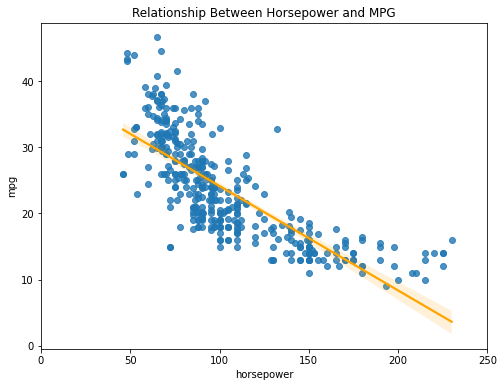

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- There exists a slope which minimizes the residuals (error)


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- Step size is a function of learning rate and the slope of the function at the iteration. The step size is how large a movement the gradient descent makes, and the step size will be larger if the slope is larger, and if the learning rate is larger. This makes sense, so that the steps will slow as we approach the minimum. Learning rate is the way we adjust the step size.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- Logistic regression is used for binary classification problems.
- Logistic regression outputs floats (probabilities) between 0 and 1 but it will predict a 0 or 1 based on the threshold.
- Logistic regression deals with probabilities based on a bernoulli distribution. Linear regression only fits with a linear trend.
- Logistic regression is parametric.


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

- Compared to linear regression, logistic regression is better for binary classification, since it uses a bernoulli distribution to create the sigmoid function which underlies it. Linear regression, on the other hand, is appropriate for prediction of continuous variables.


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns=['target'])
y = mpg_class.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
X_train_scaled

array([[-0.88631438, -0.82964316, -0.46684422, ...,  1.0948266 ,
         1.620831  , -0.68648327],
       [-0.88631438, -0.8773238 , -0.51883707, ...,  0.01094293,
        -0.04231935,  0.54542507],
       [-0.88631438, -0.743818  ,  0.15707001, ...,  0.01094293,
        -0.87389452,  0.54542507],
       ...,
       [-0.88631438, -0.45773416, -0.54483349, ...,  0.74518671,
         0.5120641 , -0.68648327],
       [-0.88631438, -0.96314895, -1.06476201, ...,  1.82907038,
         1.34363928, -0.68648327],
       [ 1.42427634,  1.91676177,  1.1449342 , ..., -0.51351691,
        -0.87389452, -0.68648327]])

In [17]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    index=X_train.index,
    columns=X_train.columns
)
X_train_scaled



X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)
X_test_scaled


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
78,-0.886314,-0.982221,-0.960776,-0.966126,0.885043,-1.151086,0.545425
274,-0.886314,-0.743818,0.235059,-0.249731,0.080871,0.512064,0.545425
246,-0.886314,-1.029902,-1.194744,-1.425989,0.325619,0.512064,1.777333
55,-0.886314,-1.029902,-0.934780,-1.242753,1.759142,-1.428278,-0.686483
387,-0.886314,-0.562632,-0.518837,-0.255642,0.045907,1.620831,-0.686483
...,...,...,...,...,...,...,...
232,-0.886314,-0.457734,-0.466844,-0.314750,0.185763,0.234872,-0.686483
193,-0.886314,-1.087119,-1.402716,-1.148180,2.353530,-0.042319,-0.686483
238,-0.886314,-0.972685,-0.726808,-0.964943,-0.478553,0.234872,0.545425
152,0.268981,0.486343,-0.882787,0.503311,1.933962,-0.319511,-0.686483


### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [18]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [19]:
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [20]:
# Code to explore
print(1 - y_train.mean())
print(y_train.mean())

0.7442748091603053
0.25572519083969464


#### Answer:

- The target column is made up of 1s and 0s. The average of y is approximately 25.6%

#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- If we simply predict a 0 every time for 'target' we will get it right over 74.4% (the additive inverse of 25.6%) of the time.


#### Part 3: How accurate would that baseline be on test data?


In [21]:
# Code to find the answer
max([y_test.mean(),1-y_test.mean()])

0.7538461538461538

#### Answer:

- The baseline would be over 75.3% accurate on the test data.


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [22]:
# call_on_students(1)

#### Answer:

- One problem is that target = 1 and target = 0 are not symmetrical. This might lead to a model which favors false negatives. Use more features and/or optimize on ROC.


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [23]:
# call_on_students(1)

In [24]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

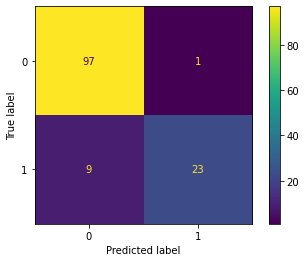

In [25]:
# Plot a confusion matrix on the test data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = y_test
y_pred = logreg.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();


### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [26]:
# call_on_students(1)

In [27]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,fscore,support = precision_recall_fscore_support(y_true, y_pred,average='binary')

print(precision,recall,fscore,support)

0.9583333333333334 0.71875 0.8214285714285714 None


In [28]:
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

In [29]:
# Accuracy

print((tp+tn)/cm.sum())


0.9230769230769231


In [30]:
# Precision
prec = tp/(tp+fp)
prec

0.9583333333333334

In [31]:
# Recall
rec = tp/(tp+fn)
rec


0.71875

In [32]:
# F1-Score
2*prec*rec/(prec + rec)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [33]:
# call_on_students(1)

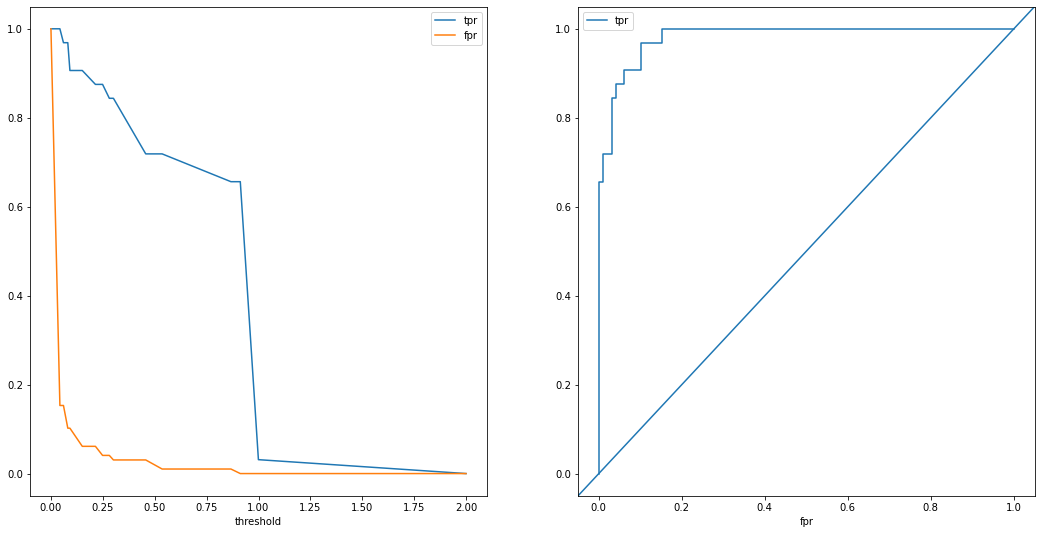

In [34]:
# Calculate roc-auc
from sklearn.metrics import roc_curve


y_prob = logreg.predict_proba(X_test_scaled)
fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])

thresh_df = pd.DataFrame({'threshold': thresholds, 'fpr':fpr, 'tpr':tpr})

fig, ax = plt.subplots(1,2,figsize=(18,9))
thresh_df.plot(x='threshold',y='tpr', ax = ax[0])
thresh_df.plot(x='threshold',y='fpr', ax = ax[0])
thresh_df.plot(x='fpr', y='tpr',ax=ax[1])
ax[1].axline([0, 0], [1, 1])




In [35]:
# Plot the ROC curve


### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [36]:
# call_on_students(1)

#### Answer:

- Our ROC curve is quite far from the theoretical 45 degree. That means the model has much better predicting power than a coin-flip. We also have a lot of leeway to select our threshold to optimize our results.


## Part 4: Decision Trees

### Set Up

NOTE! This code might not work for you! The images these generate are already prepopulated below because of that.

In [37]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [38]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

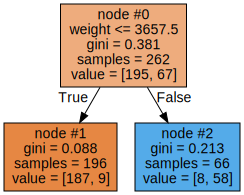

In [39]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

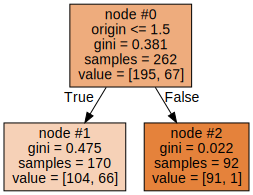

In [40]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- 


In [ ]:
parent_impurity = .381
samples = 262

In [ ]:

weight1 = 196/samples
weight2 = 66/samples
impurity1 = .088
impurity2 = .213
weighted_impurity = weight1*impurity1 + weight2*impurity2

info_A = parent_impurity - weighted_impurity

In [ ]:
weight1 = 170/samples
weight2 = 92/samples
impurity1 = .475
impurity2 = .022
weighted_impurity = weight1*impurity1 + weight2*impurity2

info_B = parent_impurity - weighted_impurity


In [ ]:

print(info_A,info_B)

0.2615114503816794 0.06506870229007639


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

c:\Users\kapta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


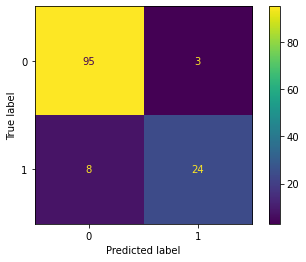

In [ ]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
plot_confusion_matrix(dt,X_test,y_test)

In [ ]:
# Plot a confusion matrix on the test data


c:\Users\kapta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\kapta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


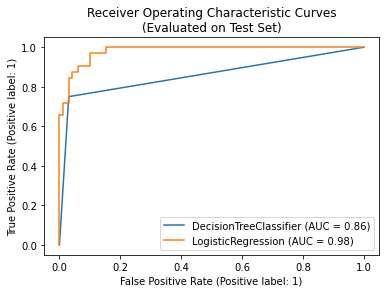

In [ ]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- 
